# Data Mining / Prospecção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 2 - Clustering

## Logistics 

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `April, 18th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P2.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/)**.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

## Team Identification

**GROUP 21**

Students:

* António Rebelo - 55761
* Filipa Serrano - 55767

## 1. Load and Preprocess Dataset

At the end of this step you should have:
* a 76 rows × 54675 columns matrix, **X**, containing the values of the 54675 features for each of the 76 samples.
* a vector, **y**, with the 76 type of medulloblastoma, which you can use later to evaluate clustering quality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
X = pd.read_csv("medulloblastoma_genes.csv", index_col=0)
X

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM918578,7.59594,6.14440,4.82431,5.67092,4.14155,5.48935,6.01078,5.17671,4.83708,4.77996,...,10.23640,10.12020,11.5560,11.2308,6.94803,6.42487,6.70991,4.48639,4.43082,3.48738
GSM918579,7.80665,6.19154,5.24439,5.62149,3.41773,5.70478,5.98896,3.45316,4.34121,4.28772,...,10.47470,10.48930,11.6799,11.3475,6.09785,4.38328,4.68583,3.40120,4.20916,4.40915
GSM918580,7.60080,5.97406,5.36270,5.78598,3.32863,6.13340,6.09108,3.63495,5.12218,4.75875,...,10.85320,10.71250,11.9298,11.6038,6.49375,3.24259,3.91999,3.13114,4.02892,4.93087
GSM918581,7.40141,5.90781,4.80566,5.97838,4.21804,5.43677,6.10166,3.37417,4.46706,4.87672,...,10.19600,10.23420,11.4141,11.0352,6.98869,5.42978,6.07764,3.95700,4.04480,3.32504
GSM918582,7.54550,6.17877,5.79088,6.21800,4.61413,5.67710,4.95301,3.39451,4.51743,5.06449,...,10.43980,10.35610,11.4329,11.0906,6.62791,4.48300,5.89798,3.47816,4.40183,3.17388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM918649,7.46691,6.05819,4.56331,5.99396,4.59915,5.82275,5.29832,3.90197,5.40042,3.44362,...,10.70730,10.59980,11.5175,11.2067,6.45363,4.41401,4.89485,3.22684,3.74242,3.47507
GSM918650,7.50064,6.38873,4.13677,5.98419,4.17285,4.11251,5.38907,4.28359,4.09101,4.18814,...,10.92920,10.79330,11.5540,11.2843,9.59624,8.20059,8.82366,3.49953,3.82864,3.23868
GSM918651,7.75074,6.54161,4.16356,6.11545,4.04480,5.55412,5.10595,3.76120,4.57780,4.23700,...,10.02130,9.90944,10.8855,10.6334,5.82865,3.59182,4.62203,3.65584,3.77963,3.21084
GSM918652,7.66767,6.60611,4.42963,5.43677,4.93087,5.23218,5.47939,3.95317,4.52070,4.50203,...,9.52511,9.47396,10.4149,10.0026,6.67380,5.20839,6.12184,3.80666,3.28466,3.09104


In order to normalize the data, the MinMaxScaler was chosen. The reason why this scaler was chosen instead of StandardScaler is because the features are all measures in the same scale and only differ on the range. That doesn't make the StadardScaler a bad option but it just means that we might loose more information by applying it, so we went with MinMax.

In [3]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(X):
  scaler = MinMaxScaler()
  X_norm = scaler.fit_transform(X.values)
  X_norm = pd.DataFrame(X_norm, index=X.index, columns=X.columns)
  return X_norm

In [4]:
X_norm = normalize_data(X)
X_norm

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM918578,0.456850,0.381546,0.462701,0.445382,0.228455,0.466289,0.858374,0.876147,0.490098,0.781718,...,0.400712,0.407704,0.638985,0.650978,0.383767,0.642130,0.568945,1.000000,0.785687,0.223170
GSM918579,0.524389,0.406485,0.591724,0.400580,0.061223,0.539248,0.844531,0.111145,0.345813,0.520500,...,0.508008,0.579518,0.708366,0.712832,0.185932,0.230677,0.156177,0.219742,0.651238,0.719231
GSM918580,0.458408,0.291430,0.628061,0.549669,0.040638,0.684407,0.909317,0.191833,0.573055,0.770463,...,0.678429,0.683417,0.848303,0.848678,0.278058,0.000788,0.000000,0.025568,0.541913,1.000000
GSM918581,0.394496,0.256381,0.456973,0.724055,0.246127,0.448482,0.916029,0.076085,0.382432,0.833066,...,0.382522,0.460770,0.559525,0.547305,0.393229,0.441584,0.440007,0.619366,0.551545,0.135805
GSM918582,0.440682,0.399729,0.759572,0.941240,0.337640,0.529874,0.187310,0.085113,0.397089,0.932711,...,0.492294,0.517514,0.570053,0.576668,0.309276,0.250774,0.403369,0.275077,0.768103,0.054457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM918649,0.415491,0.335938,0.382538,0.738176,0.334179,0.579200,0.406380,0.310351,0.654015,0.072559,...,0.612737,0.630955,0.617426,0.638204,0.268722,0.236870,0.198802,0.094377,0.368135,0.216545
GSM918650,0.426303,0.510806,0.251531,0.729321,0.235686,0.000000,0.463953,0.479734,0.273012,0.467655,...,0.712648,0.721029,0.637865,0.679334,1.000000,1.000000,1.000000,0.290442,0.420432,0.089329
GSM918651,0.506468,0.591685,0.259759,0.848291,0.206102,0.488225,0.284338,0.247870,0.414655,0.493584,...,0.303863,0.309596,0.263523,0.334340,0.123290,0.071170,0.143166,0.402830,0.390705,0.074347
GSM918652,0.479842,0.625807,0.341480,0.233155,0.410820,0.379194,0.521253,0.333076,0.398040,0.634228,...,0.080451,0.106882,0.000000,0.000000,0.319955,0.396966,0.449021,0.511270,0.090480,0.009875


In [5]:
labels = pd.read_csv("labels.csv", index_col=0)
labels

,class
samples,
GSM918578,MB-CL
GSM918579,MB-CL
GSM918580,MB-CL
GSM918581,MB-CL
GSM918582,Other
...,...
GSM918649,Other
GSM918650,MB-CL
GSM918651,Other


## 2. Dimensionality Reduction

As you already noticed the number of features (genes) is extremely high when compared to the number of objects to cluster (samples). In this context, you should perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): **X_variance** and **X_PCA**. 

**Don't change X you will need it!**

### 2.1 Variance Filtering

The Variance Threshold was chosen in order to optimize the results of the first algorithm to test, in this case, the KMeans clustering. MinMax scaling is also applied after variance filtering as doing it before, would change the way variance filtering works.

In [6]:
from sklearn.feature_selection import VarianceThreshold
#choose threshold
var_filter = VarianceThreshold(2.5)
var_filter.fit(X)
#variance filtering
X_variance = var_filter.transform(X)
X_variance = X[X.columns[var_filter.get_support(indices=True)]]
#data normalization
X_variance = normalize_data(X_variance)
X_variance.shape

(76, 152)

### 2.2 PCA dimensionality reduction

The value for n_components was also chosen with the objective of optimizing KMeans. In this case normalization is done before applying PCA.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.40)
# Use X_norm that is already normalized
pca.fit(X_norm)
X_PCA = pd.DataFrame(pca.transform(X_norm), index= labels.index)
X_PCA.shape

(76, 11)

Only 11 features explain 40 percent of the variance, so they are probably very important. Note that this value might not be optimal for other algorithms besides KMeans. More on that later.

## 3. Clustering Samples using Partitional Clustering

In [8]:
X_PCA

,0,1,2,3,4,5,6,7,8,9,10
samples,,,,,,,,,,,
GSM918578,4.770551,-8.549469,21.324537,8.709151,17.131395,-2.909600,-11.981530,-21.157930,-3.987318,6.568939,7.589855
GSM918579,36.736377,5.798625,3.274888,8.795361,-1.090314,6.653914,-10.761154,6.338351,6.638833,-5.947038,1.931663
GSM918580,21.875755,44.242589,0.647599,1.514764,17.558332,7.987595,-15.495500,13.865475,-0.305376,0.516533,-1.083811
GSM918581,13.836906,-9.691441,13.549008,9.415884,9.696170,-16.565156,-6.285631,-2.138130,-10.150008,-5.817728,0.229085
GSM918582,-1.447580,18.552414,18.845505,14.857945,-12.813185,-7.827681,3.212246,0.836936,8.509320,-4.281581,3.411028
...,...,...,...,...,...,...,...,...,...,...,...
GSM918649,14.085360,30.998926,5.686671,11.560780,-12.512228,-1.303077,5.760104,-11.539881,1.323854,17.000859,-4.271925
GSM918650,2.346372,-16.014106,-4.579738,-1.903832,-2.610773,-13.334318,-5.445831,-15.181694,4.108960,-1.317445,3.763349
GSM918651,-5.402868,14.062013,6.705199,-7.620160,-22.005935,-0.532101,10.444795,-2.355803,3.340842,7.234637,4.647725


Use **`K`-means** to cluster the samples:

* Cluster the original data (54.675 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many samples MB-CL and Other are in each cluster.     
    For instance, `{0: {'MB-CL': 51, 'Other': 0}, 1: {'MB-CL': 0, 'Other': 25}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 51 MB-CL samples and 0 Other samples and the second cluster has 0 MB-CL samples and 25 Other samples.
    You can choose how to output this information.  **Tip**: You can explore the usage of contigency matrices.
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data obtained after removing features with low variance: **X_variance**.
    * Study different values of `K` as above.

* Cluster the data obtained after applying PCA: **X_PCA**.
    * Study different values of `K` as above.

* Compare the results obtained in the three datasets above for the best `K`. 
* Discuss the results.

First of all, let's define the functions that will be used in order to study the clustering. The function elbow_kmeans(X,max_k) makes a plot for the elbow method.

In [9]:
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.cluster import KMeans

def elbow_kmeans(X,max_k):
  score = []
  #cycle through the number of clusters and fitting the model
  for cluster in range(2,max_k+1):
      kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=42)
      kmeans.fit(X)
      score.append(kmeans.inertia_)
  # plotting the score
  plt.plot(range(2,max_k+1), score)
  plt.title('The Elbow Method')
  plt.xlabel('no of clusters')
  plt.ylabel('wcss')
  plt.show()

Next, the function kmeans_score(X, max_k) will plot in the y axis the silhouette score and in the x axis the number of clusters chosen.

In [10]:
def kmeans_score(X,max_k):
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    score = []
    #iterating the number of cluster from 2 to max_k
    for n_clusters in range(2,max_k+1):
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        #calculate score
        silhouette_avg = silhouette_score(X, cluster_labels)
        score.append(silhouette_avg)
    #plot scores
    ax.bar(range(2,max_k+1), score, tick_label=range(2,max_k+1), color='mediumpurple')
    ax.set_title('Silhouette Scores for multiple numbers of clusters')
    ax.set_xlabel('nº of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.grid(axis='y', linewidth=0.5)

The function drawSillouette(X, labels, header="") draws the sillouettes given the dataset X and the labels resulting from the predictions. The function sil_kmeans(X, k_list) uses drawSillouette to draw a plot of the silhouetes scores for a list of specified K values using the Kmeans algorithm.

In [11]:
#Function taken from class notebooks
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)
    
    fig = plt.figure(figsize=(6,5))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    for i,c in enumerate(clusters):
        silhouette_values = silhouette_samples(X, labels)
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        color = cm.nipy_spectral(i / n_clusters) #np.array(["r", "g", "b", "k", "y"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, facecolor=color, edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

In [12]:
def sil_kmeans(X, k_list):
  #iterate through k
  for k in k_list:
    #fit and predict model
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)

    drawSillouette(X, kmeans.labels_, f"KMeans K={k}")

Finally the contingency_plot(X, k_list) function plots the contingency matrixes for the desired k values.

In [13]:
def elbow_kmeans(X,max_k):
  score = []
  #cycle though the number of clusters and fitting the model
  for cluster in range(2,max_k+1):
      kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=42)
      kmeans.fit(X)
      score.append(kmeans.inertia_)
  # plotting the score
  plt.plot(range(2,max_k+1), score)
  plt.title('The Elbow Method')
  plt.xlabel('no of clusters')
  plt.ylabel('wcss')
  plt.show()



In [14]:
from sklearn.metrics.cluster import contingency_matrix

def contingency_plot(X,k_list):
  #initialization of the plot
  fig, ax = plt.subplots(1,len(k_list),figsize=(5*len(k_list)+1,5))
  fig_counter =0
  for cluster in k_list:
      #fit the model
      kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=42)
      kmeans.fit(X)
      #build the contingency matrix
      Cmatrix = pd.DataFrame(contingency_matrix(labels, kmeans.labels_))
      Cmatrix.index = ["MB-CL", "Other"]
      #calculate vertical fractions
      Cmatrix_pct = Cmatrix.astype(float)
      for column in  Cmatrix_pct.columns:
        col_sum = Cmatrix_pct[column].sum()
        Cmatrix_pct[column] = Cmatrix_pct[column] /  col_sum
      #draw heatmap
      sns.heatmap(Cmatrix_pct, annot=Cmatrix, fmt='', ax=ax[fig_counter], cmap='Blues',square=True,cbar_kws={'label': 'fraction in cluster'},vmin=0, vmax=1)
      ax[fig_counter].set_title(f'Contingency matrix for n_clusters = {cluster}')
      fig_counter+=1

Now it's all setup to make the analysis. One doubt that arised is whether or not normalizing the data yields better results. Normally, normalizing the data is standard procedure, but what gives rise to question in this example is the fact that the data is all measured in the same scale, but for different features the ranges can vary quite a bit. We then decided to explore that on this preliminary example and present the results both for the normalized and the original dataset.

The first step is to look at the elbow plot.

For the original data:

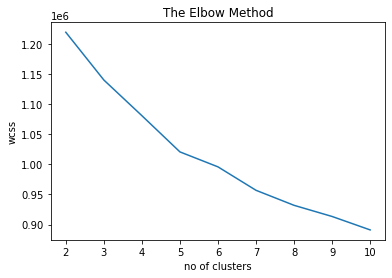

In [15]:
elbow_kmeans(X,10)

For the normalized data:

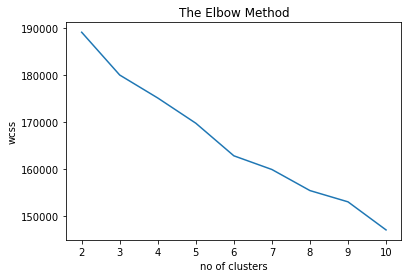

In [16]:
elbow_kmeans(X_norm,10)

It looks like for the original data, the best k seems to be 5 even though the results are not too convincing. For the normalised case there is not a clear answer as to what is the best k, because there is no elbow shape. That can indicate that the best is in K=2. Let's look at the silhouete scores to have a better picture

For the original data:

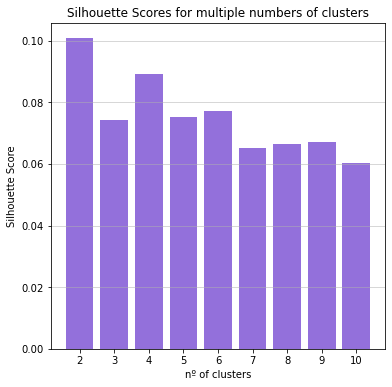

In [17]:
kmeans_score(X,10)

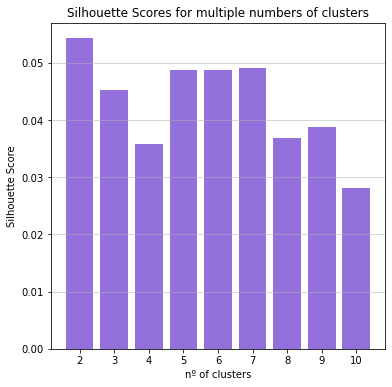

In [18]:
kmeans_score(X_norm,10)

It's curious to see that the results for the normalized and original data differ quite a bit. We note that the silhouette score is scale dependent so the numbers can't be compared directly. However the relative scores for the different numbers of clusters are interesting. 
Let's see the silhouettes of the best scores.

For the original data:

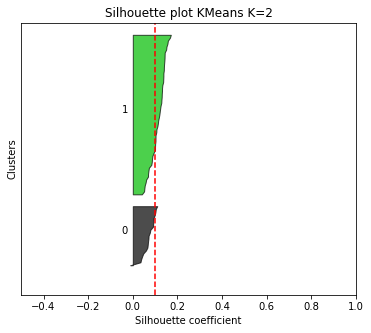

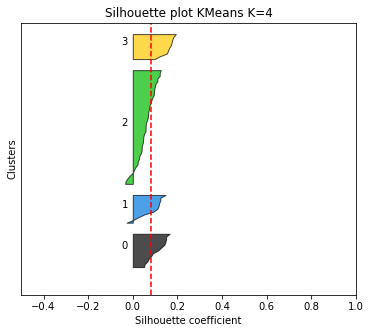

In [19]:
sil_kmeans(X,[2,4])

For the normalized data.

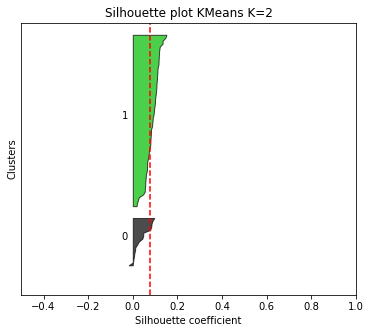

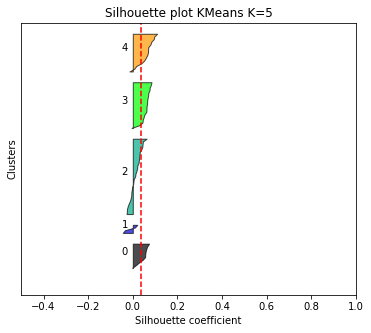

In [20]:
sil_kmeans(X_norm,[2,5])

* K=2 gives the best results in both cases with high values of silhouette scores and profiles that are uniform and similarly high.

Finally, let's look at the contingency matrices.

Note: the following graphics are colored according to the the vertical  fraction. That means that if, for a certain cluster, the separation between "MB-CL" and "other" is perfect, one square will be the darkest blue and the other white. This means that the goal is to have a matrix that looks something like a checkerboard pattern because that means the clusters are doing the separation very well.

For the original data:

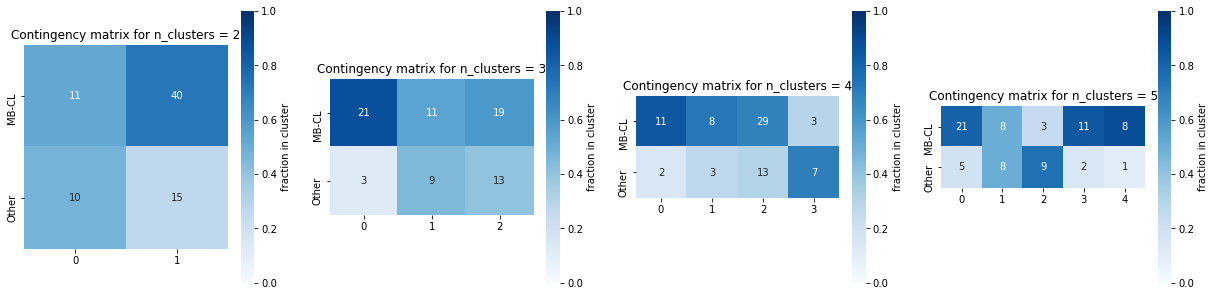

In [21]:
contingency_plot(X,[2,3,4,5])

For the normalized data:

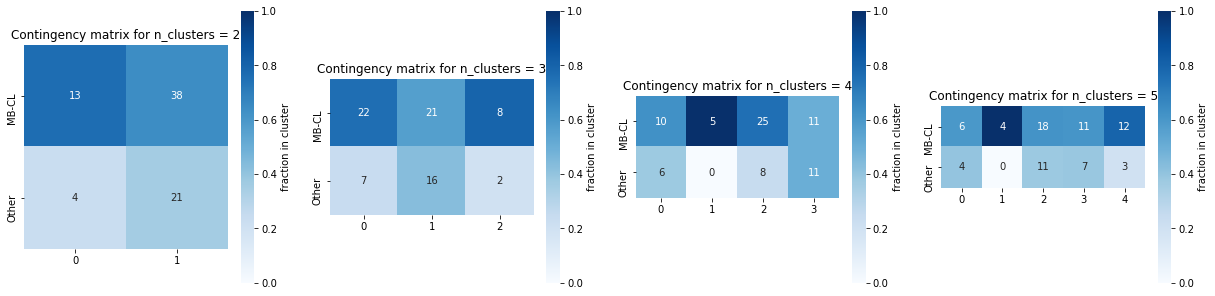

In [22]:
contingency_plot(X_norm,[2,3,4,5])

The configuration of the clusters is somewhat similar but is also different as you can see that, for example for K=4, the results with the original data are much better than with the normalized data, since the separation is clearer. This confirms what was observed in the silhouette score measurment.

Another thing to note is perhaps that the results are not so different in terms of the quality of their separations so normalizing the data can be a questionable practice in this case, however, since it doesn't decrease the performance either and is standard practice we'll only use the normalized data in the examples that follow.

### 3.2 Clustering with variance filtering

Let's analyse the clustering using variance filtering, but before let's make a few notes:

* Several values for the variance threshold were tried. Showing them here would clutter this report. 
* It was concluded that 2.5 was the value that yielded the best results. 
* With this value there are 152 features.

Let's start by applying the elbow method:

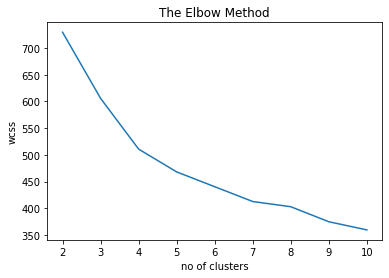

In [23]:
elbow_kmeans(X_variance, 10)

Already the elbow plot is very different than before with clear candidates on K=4 and K=5

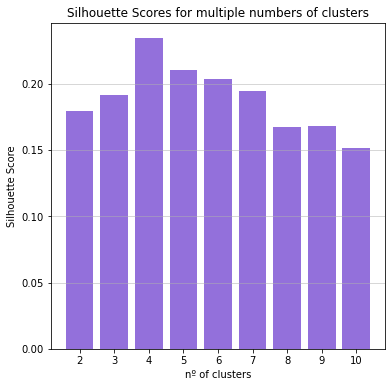

In [24]:
kmeans_score(X_variance,10)

K=4 is the front runner and k=5 and k=6 are the second best values

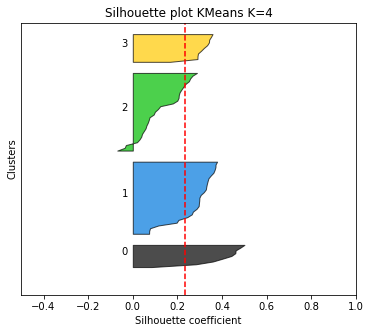

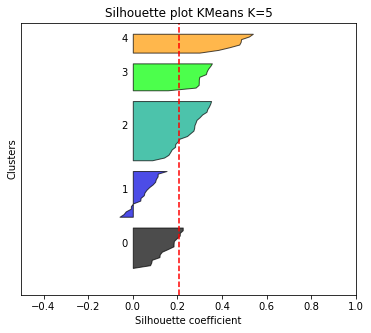

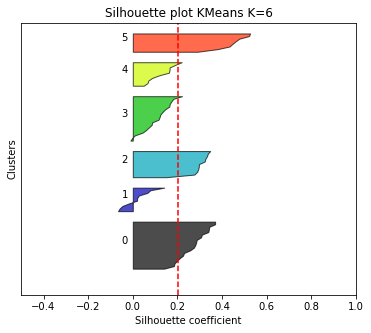

In [25]:
sil_kmeans(X_variance,[4,5,6])

* K=4 has the most balanced silhouette, even though in one cluster there are negative values, more on that in a second.

* An interesting observation is that there are 3 clusters with similar silhouette shapes that appear for K=4,5 and 6, indicating that they are actually the same clusters. 

* This also implies that there is one remaining group of points besides those 3 and the algorithm has to decide whether to group them together or not. Looking at the results, it looks like it decided that the best thing is to put all those points in the same cluster (which happens for k=4). 

* Interestingly, perhaps the price you have to pay to do that is having some values with negative silhouette scores, because that doesn't occur with K=5 and K=6.

Now the contingency matrices:

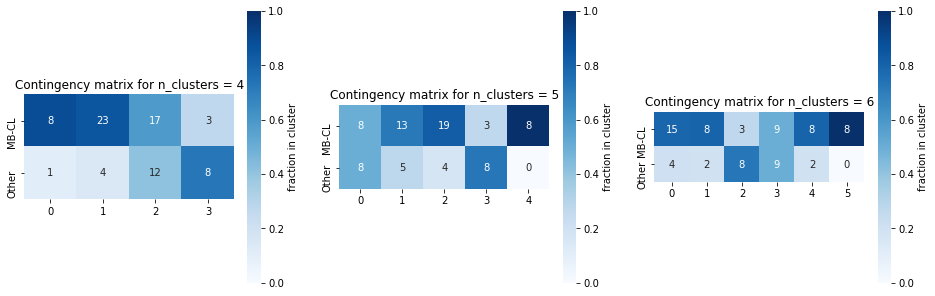

In [26]:
contingency_plot(X_variance,[4,5,6])

* For K=4, note that the groups don't seem to be so different than the case without variance filtering. 

* With the exception of one group, they provide good separation. The group that doesn't separate the samples clearly is probably the group that has the worst silhouette score and even with K=5 and 6 (for K=6 that group splits in two), these samples are hard to separate. 

* You can see once again that severall clusters remain very similar for all three values of K indicating that those clusters are very well formed.

### 3.2 Clustering with PCA

The difficult thing about PCA was to decide what how selective to be with the explained variance percentage and that is in itslef a parameter of the algorithm. Values ranging from 0.30 to 0.99 were tested and we settled on 0.40. With this value there are 11 features and some unexpected good results were obtained. Let's take a look:

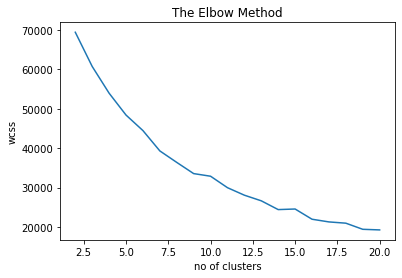

In [27]:
elbow_kmeans(X_PCA,20)

Hard to single out a a value here but the best candidates seem to be somewhere in the 8-12 region. Let's see the scores.

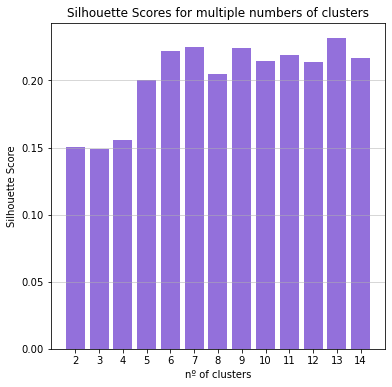

In [28]:
kmeans_score(X_PCA, 14)

Let's pick 9,11 and 12 to see their silhouettes

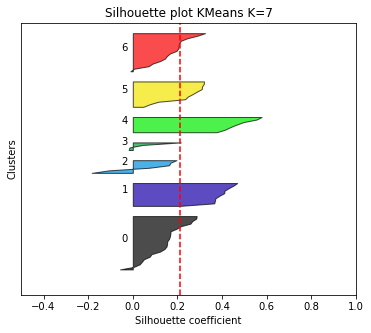

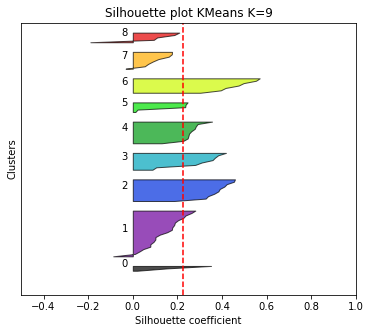

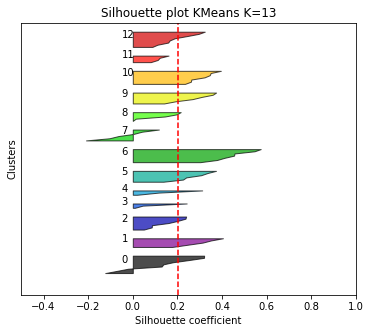

In [29]:
sil_kmeans(X_PCA,[7,9,13])

Even though K=7 doesn't have the best average silhouette score, it has beautifull shapes. All of the clusters are very positive and the shapes very uniform. K=13 has significantly higher average silhouette score so it's a good candidate too. Let's now see the coningency plot.

In [30]:
pca = PCA(n_components=0.40)
X_PCA = pca.fit_transform(X_norm)
X_PCA = pd.DataFrame(X_PCA)
X_PCA.shape

(76, 11)

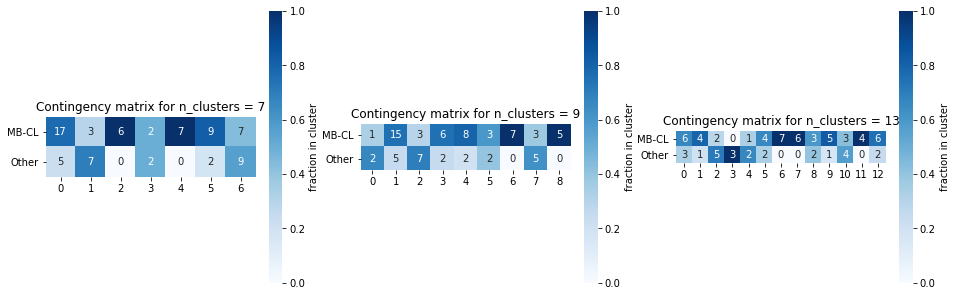

In [31]:
contingency_plot(X_PCA,[7,9,13])

We would need more samples to do a proper evaluation of these results as there are clusters with very few samples, but it seems like the results are ok. Probably K=13 yielded the best average silhouette score because it encounters 4 pure separations.

Summming up:

* It could be said that Kmeans can provide separations that work reasonably well but that are not perfect. 

* There is a group of points in data that seems to be harder to cluster together.

* The number of optimal clusters differs considerably between the variance filtering and PCA techniques.

* It's hard to say what were the best results. With Variance filtering probably K=4 and with PCA K=13.

## 4. Clustering Samples using Hierarchical Clustering

Use a **Hierarchical Clustering Algorithm (HCA)** to cluster the samples: 

* Cluster the data in **X_variance**.
    * Use **different linkage metrics**.
    * Use different values of `K`.
    * For each linkage metric and value of `K` present the clustering by specifying how many MB-CL and Other samples are in each cluster as you did before. 
    * What is the best linkage metric and the best value of `K`? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data in **X_PCA**.
    * Study different linkage metrics and different values of `K` as above.

* Compare the results obtained in the two datasets above for the best linkage metric and the best `K`. 
* Discuss the results

For Hierarquichal Clustering, besides choosing between different options of values for k, we also have several options for the linkage metric. 

Therefore, we will start by creating the function hierarchical_score that creates a plot for each linkage metric, and in each plot, the silhouette score of each k value. This allows us to have a summary of the scores to understand which ones create better clusters to further analyse.

Since we have so many different combinations (4 different metrics with a lot of different possible k values), we will start by using the Silhouette Score as an indicator of the combinations that are more worth exploring, so we can make a more thorough analysis on those.

In [32]:
from sklearn.cluster import AgglomerativeClustering

def hierarchical_score(X,max_k):
  fig, axs = plt.subplots(2,2,figsize=(12,10))
  metrics=['complete', 'ward', 'single', 'average']
  #iterate on the metrics
  for i, ax in enumerate(axs.flatten()):
    score = []
    metric=metrics[i]
    #iterate on the number of clusters
    for cluster in range(2,max_k+1):
        hierarchical = AgglomerativeClustering(linkage=metric, n_clusters=cluster)
        hierarchical.fit(X)
        score.append(silhouette_score(X, hierarchical.labels_))
    ax.bar(range(2,max_k+1), score, tick_label=range(2,max_k+1), color='mediumpurple')
    ax.set_title('Silhouette Coefficient w/ '+str(metric)+' linkage metric')
    ax.set_xlabel('nº of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.grid(axis='y', linewidth=0.5)

We then created the function contingency_plot_h_general, similar to the one from partitional clustering but using hierarquichal clustering and the different possible linkage metrics.

In [33]:
from sklearn.metrics.cluster import contingency_matrix

def contingency_plot_h_general(X,max_k=4):
  fig, ax = plt.subplots(4,max_k-1, figsize=(20,20))
  x_plot=0
  metrics=['complete', 'ward', 'single', 'average']
  #iterate on the metrics
  for metric in metrics:
    y_plot=0
    for cluster in range(2,max_k+1):
        hierarchical = AgglomerativeClustering(linkage=metric, n_clusters=cluster)
        hierarchical.fit(X)
        
        #build the contingency matrix
        Cmatrix = pd.DataFrame(contingency_matrix(labels, hierarchical.labels_))
        Cmatrix.index = ["MB-CL", "Other"]
        
        #calculate vertical fractions
        Cmatrix_pct = Cmatrix.astype(float)
        
        for column in  Cmatrix_pct.columns:
          col_sum = Cmatrix_pct[column].sum()
          Cmatrix_pct[column] = Cmatrix_pct[column] /  col_sum
        # draw scale only in last plot
        if y_plot == max_k-2:
          sns.heatmap(Cmatrix_pct, ax=ax[x_plot, y_plot], annot=Cmatrix, fmt='', cmap='Blues',square=True,cbar_kws={'label': 'fraction in cluster'},vmin=0, vmax=1)
          ax[x_plot, y_plot].set_title(f'{cluster} clusters using {metric} linkage')
        else:
          sns.heatmap(Cmatrix_pct, ax=ax[x_plot, y_plot], annot=Cmatrix, fmt='', cmap='Blues',square=True,cbar=False,vmin=0, vmax=1)
          ax[x_plot, y_plot].set_title(f'{cluster} clusters using {metric} linkage')
        if y_plot < max_k-2:
          y_plot+=1 
    if x_plot < 4:
      x_plot+=1 


### 4.1 Clustering with Variance Filtering

We used the value 2.5, also used in the previous section since it provided some of the best results. We used the X_variance dataset created and normalized in section 2.

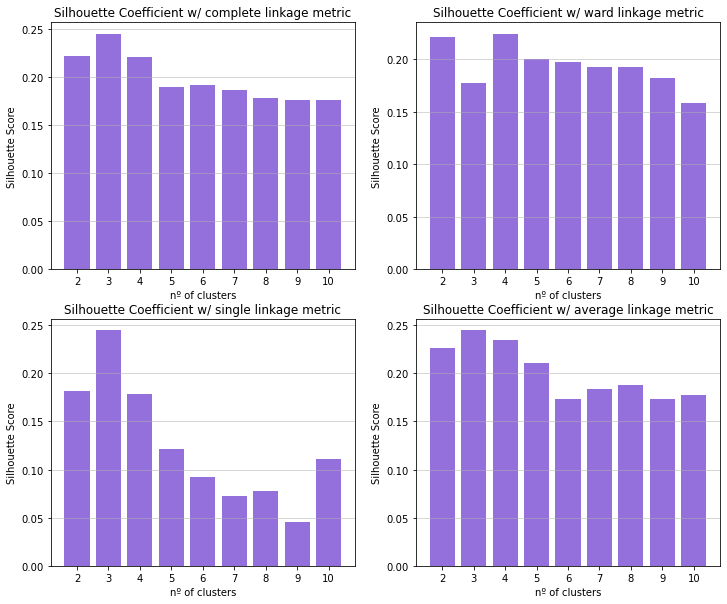

In [34]:
hierarchical_score(X_variance, 10)

We can see that, according to the silhouette coefficient, the best k value for the complete, single and average linkage is 3, and for the ward linkage method it is 2 and 4. The ward methric seems to be the one which creates the clusters we are more interested in, since we want to divide our samples in two main groups and there are 4 total groups.

We can also see that the top scores are always between the first 5 values, and as k increases, the scores tend to be worse, so we will focus more on k values between 2 and 5.

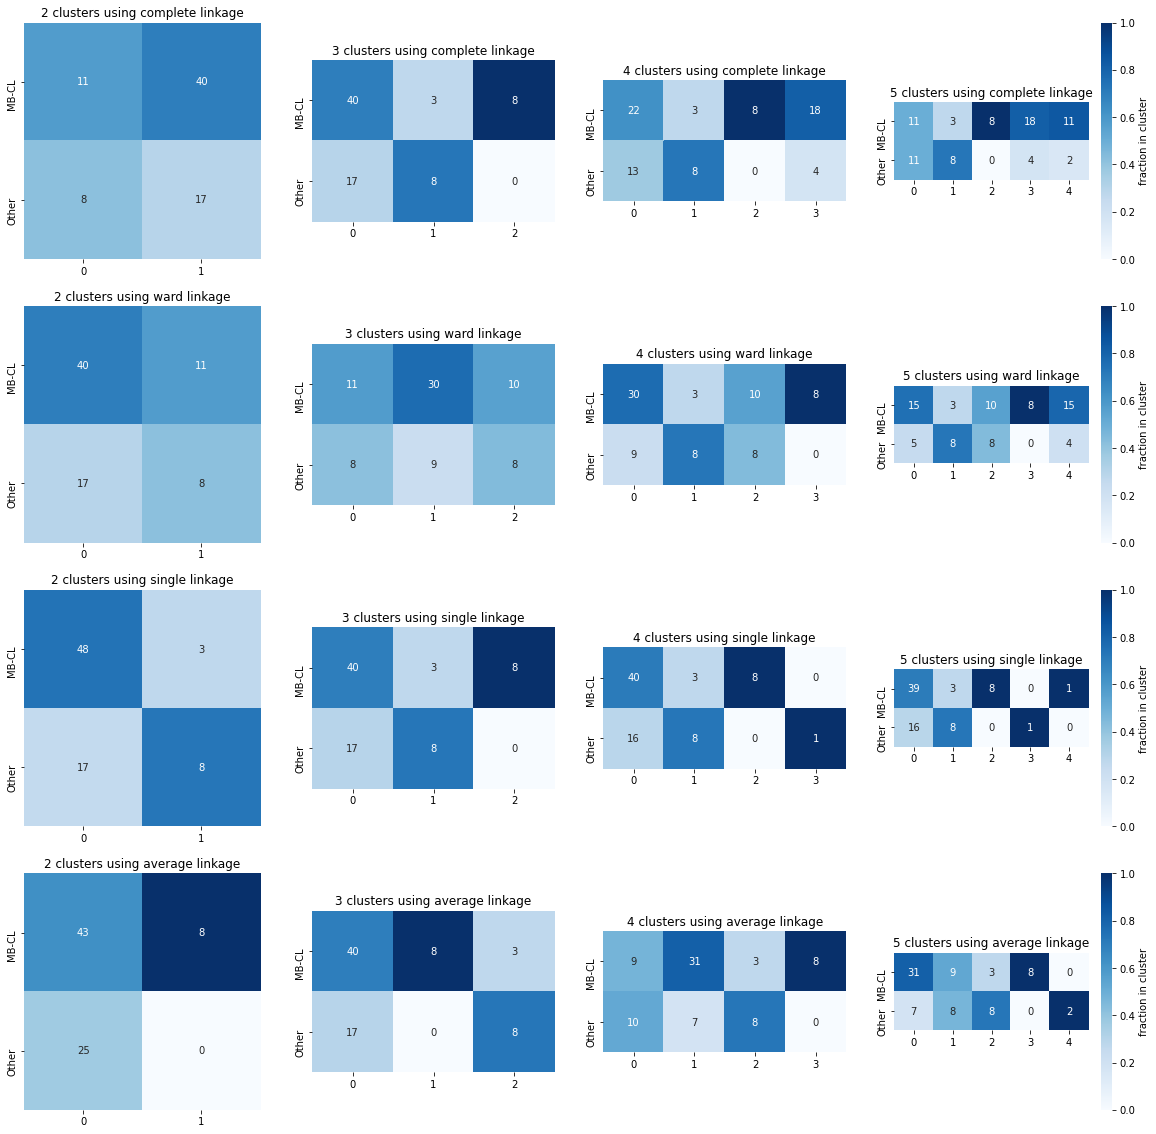

In [35]:
contingency_plot_h_general(X_variance,5)

* The 3 top results for silhouette score (complete, single and average linkage and k=3) create what seem to be the same set of clusters, which seem to be the best clusters possible, at least for the used criteria.

* A cluster with 8 MB-CL and 0 Others is very frequently created by the different metrics and different values of k, which leads us to believe it is including the same 8 samples, which probably correspond to very closely related samples from the MB-CL blastoma.

* It is also sometimes observed a cluster of 8 "others" which could correspond to a cluster including the two blastoma types- desmoplastic nodular and medullomyoblastoma, which have 6 and 2 samples, which coincidentally sum 8. Note that it could also just be a coincidence.

* A lot of clusters have 17 "others" which could be the 17 anaplastic blastomas. Again this is all hypothethical. Domain knowledge would be needed in order to explore and confirm these theories.

* Overall, there are no great clusters which are able to separate MB-CL from Others. A lot of times, there is one big cluster which includes most of the MB-CL and most of the others, for example clusters which have 40 MB-CL and 17 "others". 

* The best value of k seems to be 3 with every linkage metric except ward.

### 4.2 Clustering with PCA

We will use the dataset X_PCA created in section 2, since the parameters used worked well for the clustering.

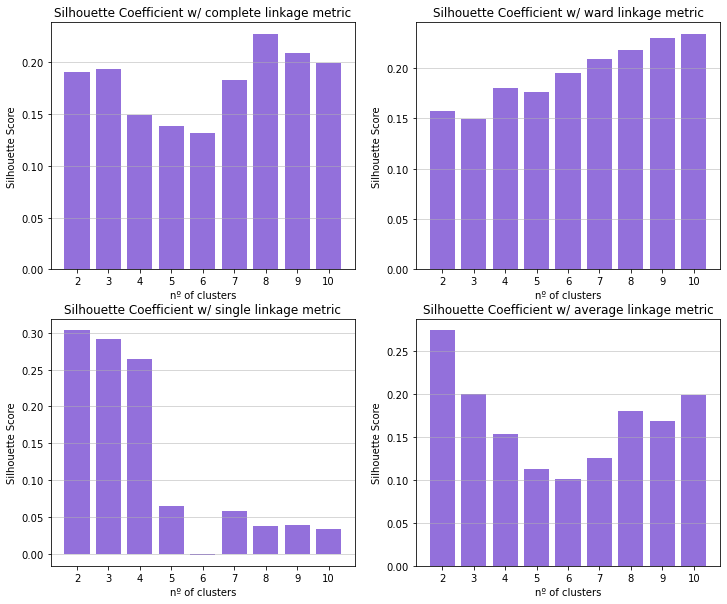

In [36]:
hierarchical_score(X_PCA, 10)

* The different linkage metrics present very different scores for each k value.

* Overall, the values are similar to the ones using the X_variance dataset, with the best ones around 0.25. However, using this dataset there are more variations for different values of k of the same metric (for example, for the linkage metric, k=2 has a silhouette score of around 0.3 and k=6 of around 0).

* For the complete and ward linkage, the best k values are above 7, and for single and average linkage the best k values are below 5, so we will explore these clusters in more detail.

Since the best values of k are not all below a certain k value, as they were in X_variance, we will have to adapt the function created before, so we can look at more specific k values for each measure.

In [37]:
from sklearn.metrics.cluster import contingency_matrix

def contingency_plot_h_specific(X, metric, min_k=2, max_k=4):
  fig, ax = plt.subplots(1,max_k-min_k+1, figsize=(20,5))
  nr_plots= max_k-min_k
  x_plot=0
  #iterate through the number of clusters
  for cluster in range(min_k,max_k+1):
      hierarchical = AgglomerativeClustering(linkage=metric, n_clusters=cluster)
      hierarchical.fit(X)
      #build the contingency matrix
      Cmatrix = pd.DataFrame(contingency_matrix(labels, hierarchical.labels_))
      Cmatrix.index = ["MB-CL", "Other"]
      #calculate vertical fractions
      Cmatrix_pct = Cmatrix.astype(float)
      for column in  Cmatrix_pct.columns:
        col_sum = Cmatrix_pct[column].sum()
        Cmatrix_pct[column] = Cmatrix_pct[column] /  col_sum
      #draw scale only for the last plot
      if x_plot == nr_plots:
        sns.heatmap(Cmatrix_pct, ax=ax[x_plot], annot=Cmatrix, fmt='', cmap='Blues',square=True,cbar_kws={'label': 'fraction in cluster'},vmin=0, vmax=1)
        ax[x_plot].set_title(f'{cluster} clusters using {metric} linkage')
      else:
        sns.heatmap(Cmatrix_pct, ax=ax[x_plot], annot=Cmatrix, fmt='', cmap='Blues',square=True,cbar=False,vmin=0, vmax=1)
        ax[x_plot].set_title(f'{cluster} clusters using {metric} linkage')
      if x_plot < max_k-2:
        x_plot+=1


For **complete** linkage:

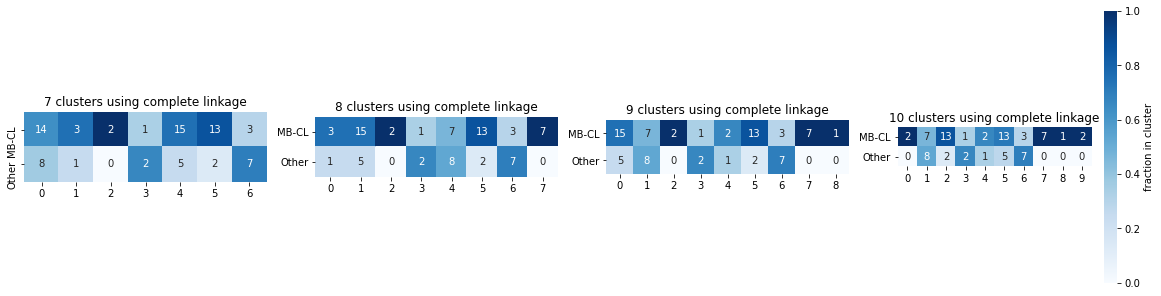

In [38]:
contingency_plot_h_specific(X_PCA,'complete', min_k=7, max_k=10)

For **ward** linkage:

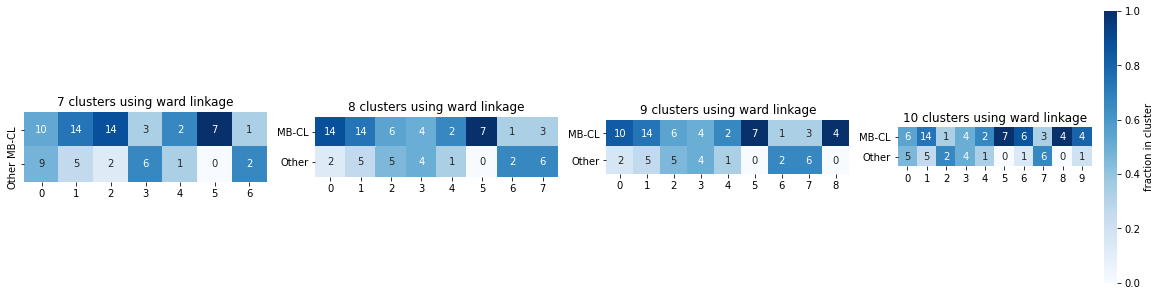

In [39]:
contingency_plot_h_specific(X_PCA,'ward', min_k=7, max_k=10)

For **single** linkage:

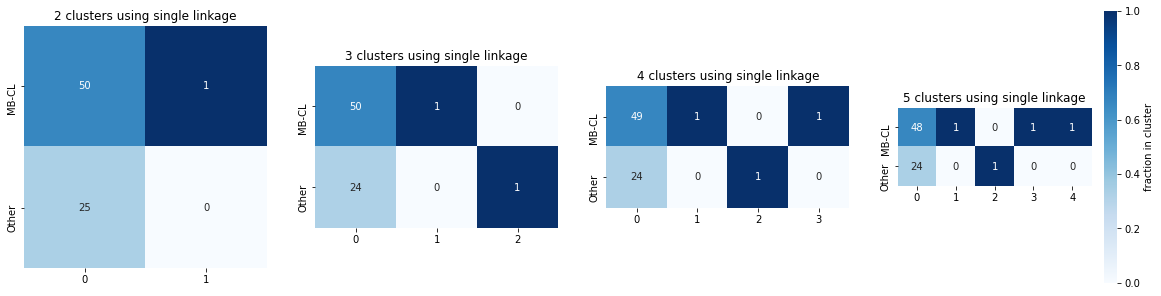

In [40]:
contingency_plot_h_specific(X_PCA, 'single', min_k=2, max_k=5)

For **average** linkage:

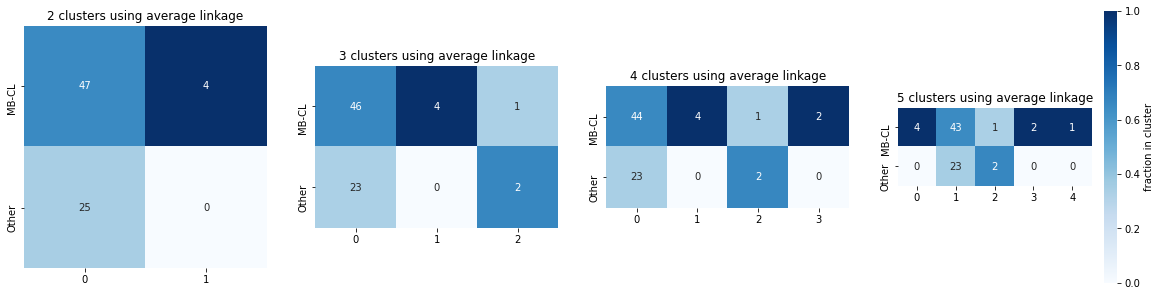

In [41]:
contingency_plot_h_specific(X_PCA, 'average', min_k=2, max_k=5)

* Overall, there are no great clusters which are able to separate MB-CL from Others. Most of the times, the "Others" are included in clusters alongside the "MB-CL", with few clusters where the "Others" are the majority.

* Looking at the results from complete and ward linkage, there are a lot of pure clusters with samples only from MB-CL, but this does not happen for the "Others". In the ward linkage there are several clusters which contain a similar amount of MB-CL and others, so they do a bad job at separating both types.

* It seems that the silhouette score sometimes might be being overestimated because of some "pure" clusters (clusters that have only one type of examples), specially in the single and average linkages, where the clusters are not separating the types well but have high silhouette scores. For this reason, we will not consider the single and average linkage for k=2 the best clusters, even though they have the best silhouette scores.

* The best combination of metric and k value seems to be k=8 with complete linkage

### 4.3 Comparing Results

Overall, the clusterings were not incredible in either dataset.

There were significant differences between the two datasets: in the overall distribution of scores for the values of k, as well as in the type of clusters created, as it was commented before. The clusters seemed to be a bit better for X_variance.

The values of k which provided the best silhouette scores were also different; in X_variance it was clear that k=3 and 4 were the best values, while for X_PCA it was 2, 8 and 10.

## 5. Evaluating Clustering Results

In this task you should compare the best results obtained using `K`-means and HCA 
1. **Without using ground truth**
2. **Using ground truth (`Medulloblastoma Type`)**.

### 5.1. Without Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

Since the Silhouette Coefficient was already used for finding the best values of k, the two remaining options were the Calinski-Harabasz Index and the Davies-Bouldin Index. We will use the Calinski-Harabasz since it was the one used during class and since the other one limits the distance metric to Euclidean space. Even though Euclidian distance is the default one used in most methods, we thought Calinski-Harabasz would be more inclusive.

We included the Silhouette Score in the output, since it was the metric used to decide the best models before.

In [42]:
from sklearn import metrics

model_dict= {"K-Means X_Variance k=4": KMeans(n_clusters=4, random_state=42).fit(X_variance),
             "K-Means X_PCA k=13": KMeans(n_clusters=13, random_state=42).fit(X_PCA),
             "HCA X_Variance Complete Linkage k=3": AgglomerativeClustering(linkage="complete", n_clusters=3).fit(X_variance),
             "HCA X_PCA Complete Linkage k=8": AgglomerativeClustering(linkage="complete", n_clusters=2).fit(X_PCA)}

dataset_dict= {"K-Means X_Variance k=4": X_variance,
             "K-Means X_PCA k=13": X_PCA,
             "HCA X_Variance Complete Linkage k=3": X_variance,
             "HCA X_PCA Complete Linkage k=8": X_PCA}


scores_dict={}
for key, value in model_dict.items():
  cluster_labels = value.labels_
  c_score = round(metrics.calinski_harabasz_score(dataset_dict[key], cluster_labels), 3)
  s_score = round(silhouette_score(dataset_dict[key], cluster_labels), 3)
  scores_list=[s_score, c_score]
  scores_dict[key] = scores_list

ch_scores = pd.DataFrame(scores_dict, index=['Silhouette','Calinski-Harabasz'])
ch_scores.transpose()

,Silhouette,Calinski-Harabasz
K-Means X_Variance k=4,0.235,18.510
K-Means X_PCA k=13,0.202,10.886
HCA X_Variance Complete Linkage k=3,0.245,15.270
HCA X_PCA Complete Linkage k=8,0.191,4.314


* There are some differences in the scores given by each metric. The best model according to the Silhouette score is HCA with k=3, while according to the Calinski-Harabasz it is the K-Means with k=4.

* The most relevant difference is for the HCA with k=8, while it has a similar Silhouette Score to the others, it has a much lower Calinski-Harabasz.

We should keep in mind that these measures that do not use ground truth are just evaluating how well defined the clusters are in each case and not exactly if they are good clusters according to the reality of their samples. For that type of evaluation, we will use ground truth

### 5.2. Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

We will use the Fowlkes-Mallows score because: it is widely used and is an overall good indicator; has well defined boundaries (0 to 1, where values close to 0 indicate two label assignments that are largely independent, while values close to 1 indicate significant agreement), and finally, a random labeling will have a FMI score close to 0.0, which is very good because it will not return a good score for a randomly labeled sample, if the score is good, it is because the model labels are actually related to the real labels. This last point is a disadvantage of some score methods, but not this one.

Its only disadvantage is the fact that it requires knowledge of the ground truth classes, but this is not a problem for us, and every measure we would select for this part would have that need.

We also included the Silhouette Score in the output, since it was the metric used to decide the best models before.

In [43]:
from sklearn import metrics

model_dict= {"K-Means X_Variance k=4": KMeans(n_clusters=4, random_state=10).fit(X_variance),
             "K-Means X_PCA k=13": KMeans(n_clusters=13, random_state=10).fit(X_PCA),
             "HCA X_Variance Complete Linkage k=3": AgglomerativeClustering(linkage="complete", n_clusters=3).fit(X_variance),
             "HCA X_PCA Complete Linkage k=8": AgglomerativeClustering(linkage="complete", n_clusters=2).fit(X_PCA)}

dataset_dict= {"K-Means X_Variance k=4": X_variance,
             "K-Means X_PCA k=13": X_PCA,
             "HCA X_Variance Complete Linkage k=3": X_variance,
             "HCA X_PCA Complete Linkage k=8": X_PCA}

scores_dict={}
for key, value in model_dict.items():
  cluster_labels = value.labels_
  c_score = round(metrics.fowlkes_mallows_score(labels['class'], cluster_labels),3)
  s_score = round(silhouette_score(dataset_dict[key], cluster_labels), 3)
  scores_list=[s_score, c_score]
  scores_dict[key] = scores_list

ch_scores = pd.DataFrame(scores_dict, index=['Silhouette','Fowlkes Mallows'])
ch_scores.transpose()

,Silhouette,Fowlkes Mallows
K-Means X_Variance k=4,0.234,0.445
K-Means X_PCA k=13,0.231,0.242
HCA X_Variance Complete Linkage k=3,0.245,0.600
HCA X_PCA Complete Linkage k=8,0.191,0.727


* The scores obtained with Fowlkes Mallows Score are quite different from the ones without ground truth. 

* This could mean that the real groups of samples are not organized in well defined clusters. This hypothesis is supported by the fact that the model with the smallest silhouette and Calinski-Harabasz score is the one with the biggest Fowlkes Mallows score, which means that even thought it is not creating well defined clusters, it is grouping the samples more or less in their correct groups.

* Maybe it would have been better to have used a measure that uses ground truth to make some of the decisions regarding which clusters are best in the previous sections.

* Comparing both algorithms, the hierarquichal has better Fowlkes-Mallow score, possibly because the K-Means is more adequate for datasets with even cluster sizes, which is not the case.

## 6. Clustering Samples using Density-based Clustering

Use DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) or OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the samples.

Compare the results with those of K-means and HCA.

We will use DBSCAN since it is a very well known density based algorithm and it was the one we focused more in class. 

Choosing the right parameters can be challenging.
We will first choose a value for min_samples, and then use the tune_eps function to try to see the eps "elbow". This function receives as input the dataset X and the number of neighbors to consider. We will use for this input, the min_samples value.

In [44]:
from sklearn.neighbors import NearestNeighbors

def tune_eps (X, n):
  #calculate nearest neighbors
  nearest_neighbors = NearestNeighbors(n_neighbors=n)
  neighbors = nearest_neighbors.fit(X)
  distances, indices = neighbors.kneighbors(X)
  distances = np.sort(distances[:,(n-1)], axis=0)

  fig = plt.figure(figsize=(5, 5))
  plt.plot(distances)
  plt.title("Tuning eps elbow point")
  plt.xlabel("Points")
  plt.ylabel("Distance")
  plt.show()

The function density_score(X, min_samples, eps) plots the silhouette score for the chosen eps values

In [45]:
from sklearn.cluster import DBSCAN

def density_score(X, min_samples, eps_list):
  fig, ax = plt.subplots(1,1,figsize=(6,6))
  score = []
  #iterate through the chosen eps list
  for i in eps_list:
      dbscan = DBSCAN(eps=i, min_samples=min_samples)
      dbscan.fit(X)
      score.append(silhouette_score(X, dbscan.labels_))
  #plot
  ax.bar(range(len(eps_list)), score, tick_label=eps_list, color='mediumpurple')
  ax.set_title('Silhouette Coefficient')
  ax.set_xlabel('eps value')
  ax.set_ylabel('Silhouette Score')
  ax.grid(axis='y', linewidth=0.5)

Finally, we created a function for plotting the contingency plots.

In [46]:
 def contingency_plot_d(X, eps, min_samples=5):
  fig, ax = plt.subplots(1,len(eps), figsize=(20,5))
  nr_plots= len(eps)
  x_plot=0
  for i in eps:
    dbscan = DBSCAN(eps=i, min_samples=min_samples)
    dbscan.fit(X)
    Cmatrix = pd.DataFrame(contingency_matrix(labels, dbscan.labels_))
    Cmatrix.index = ["MB-CL", "Other"]
    Cmatrix_pct = Cmatrix.astype(float)
    for column in  Cmatrix_pct.columns:
      col_sum = Cmatrix_pct[column].sum()
      Cmatrix_pct[column] = Cmatrix_pct[column] /  col_sum
    if x_plot == nr_plots:
      sns.heatmap(Cmatrix_pct, ax=ax[x_plot], annot=Cmatrix, fmt='', cmap='Blues',square=True,cbar_kws={'label': 'fraction in cluster'},vmin=0, vmax=1)
      ax[x_plot].set_title(f'Nmin= {min_samples}, eps={i}')
    else:
      sns.heatmap(Cmatrix_pct, ax=ax[x_plot], annot=Cmatrix, fmt='', cmap='Blues',square=True,cbar=False,vmin=0, vmax=1)
      ax[x_plot].set_title(f'Nmin={min_samples}, eps={i}')
    if x_plot < len(eps):
      x_plot+=1


We will not use the X dataset, since we realise it is too big and it is preferable to work with the dimentionality reduction versions: X_variance and X_PCA as it was done for HCA clustering.

### 6.1 Clustering with Variance Filtering

The reccommended value for min_samples is for it to be slighlty larger the number of features. Since there are 152 features in X_variance, this is not possible so we decided to leave the default value. Eps needs to be tunned and that is done using the ellbow method:

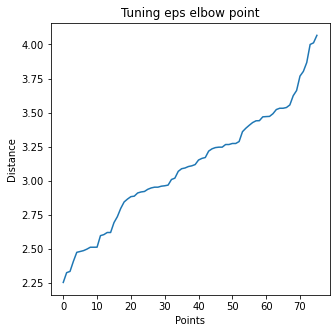

In [47]:
tune_eps(X_variance, 5)

We can see that the bigger slopes seem to be around 2.45, 2.75, 3.3 and 3.8 in the distance axis.

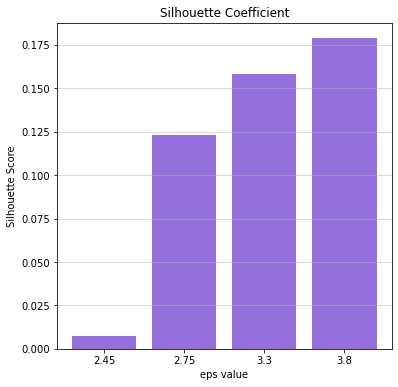

In [48]:
eps=[2.45, 2.75, 3.3, 3.8]
density_score(X_variance, 5, eps)

Let's look at the Silhouette Plots of the extremes (2.45 and 3.8).

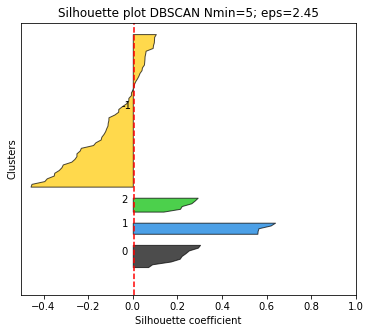

In [49]:
dbscan = DBSCAN(eps=2.45, min_samples=5)
dbscan.fit(X_variance)
drawSillouette(X_variance, dbscan.labels_, "DBSCAN Nmin=5; eps=2.45")

We can see there is a lot of noise (-1) which negatively impacts the total score making it very low, and besides that, 3 clusters are formed.

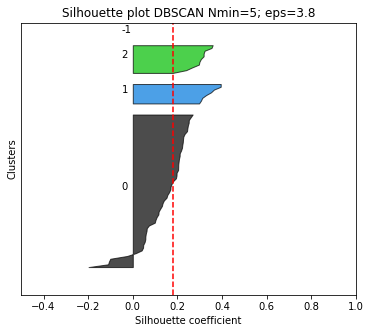

In [50]:
dbscan = DBSCAN(eps=3.8, min_samples=5)
dbscan.fit(X_variance)
drawSillouette(X_variance, dbscan.labels_, "DBSCAN Nmin=5; eps=3.8")

Here we can see that there is almost no noise, and there are 3 relatively homegeneous clusters formed. 

Finally, let's look at how the models divided the samples.

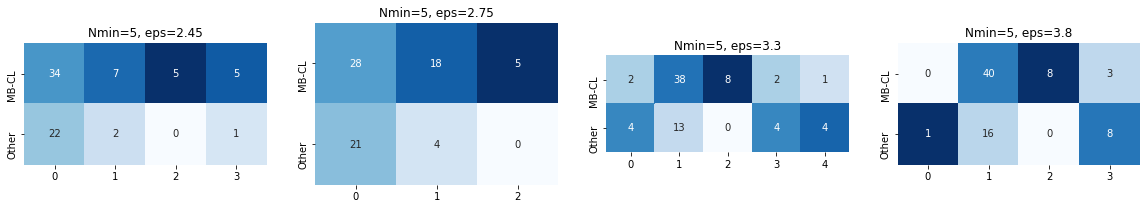

In [51]:
contingency_plot_d(X_variance, [2.45, 2.75, 3.3, 3.8], min_samples=5)

Once again there are no great clusters that are able to separate MB-CL and Others well. The "Others" are mainly mixed with MB-CL in big clusters.



### 6.2 Clustering with PCA

We started by choosing a value of min_samples, which now doesn't have the same limitation as before so we chose the value of 15, since there are 11 dimensions.
After that, we ploted the elbow to choose the best values for eps.

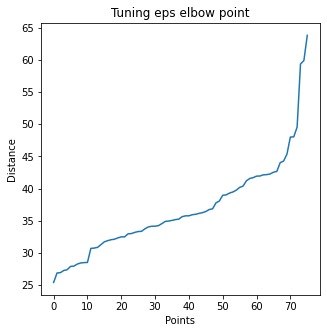

In [52]:
tune_eps(X_PCA, 15)

There were only two "elbows" which yielded results, which were 30 and 40, so let's look at their silhouette values.

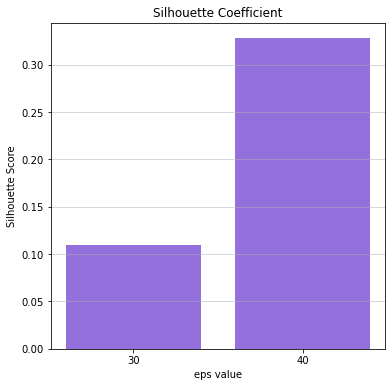

In [53]:
eps=[30, 40]
density_score(X_PCA, 15, eps)

Let's check the silhouette plot of the best one.

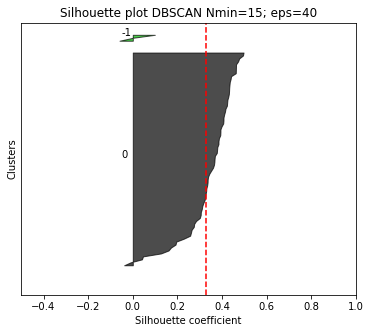

In [54]:
dbscan = DBSCAN(eps=40, min_samples=15)
dbscan.fit(X_PCA)
drawSillouette(X_PCA, dbscan.labels_, "DBSCAN Nmin=15; eps=40")

Even though it had a high silhouette coefficient, we can now see that this model is not actually good, only creating one main cluster and one small noise cluster. All of the models created with DBSCAN on X_PCA performed similarly to this.

We tried different parameters to try to find better clusters, but we were not able to do so.

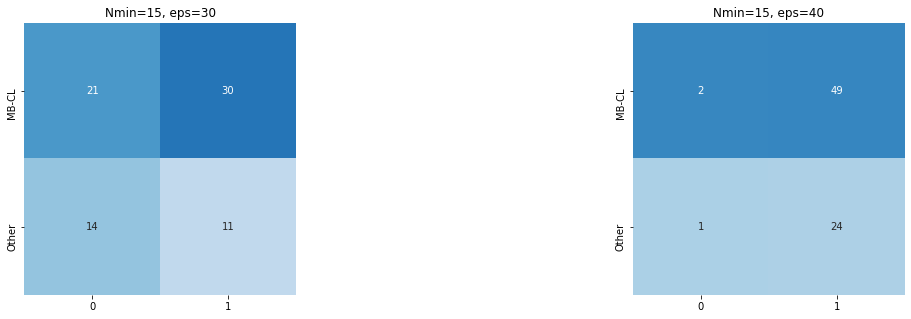

In [55]:
contingency_plot_d(X_PCA, [30, 40], min_samples=15)

Even though the silhouette scores were high (specially the second one), we now see that the clusters created are not very good, having two clusters with a mix of both sample types.

### 6.2 Comparing Results

Overall, DBSCAN seems to have worked better with the X_variance dataset than with the PCA.

This difference might be due to differences in the data dimentionality that resulted in different densities of clusters. We know that DBSCAN performs best when we have dense clusters, which doesn't seem to be the case, specially for the X_PCA dataset. 

Comparing with the results from K-Means and HCA, there were generally lower silhouette scores, which was expected since one of the drawbacks of this measure is being lower for density based clustering. Regarding the clusters created, this measure performed similarly to the other algorithms on the X_variance dataset. Here is a summary of the best scores of each algorithm:

In [56]:
model_dict= {"K-Means": KMeans(n_clusters=4, random_state=10).fit(X_variance),
             "HCA": AgglomerativeClustering(linkage="complete", n_clusters=3).fit(X_variance),
             "DBSCAN": DBSCAN(eps=3.8, min_samples=5).fit(X_variance)}

dataset_dict= {"K-Means": X_variance,
             "HCA": X_variance,
             "DBSCAN": X_variance}

scores_dict={}
for key, value in model_dict.items():
  cluster_labels = value.labels_
  c_score = round(metrics.fowlkes_mallows_score(labels['class'], cluster_labels),3)
  s_score = round(silhouette_score(dataset_dict[key], cluster_labels), 3)
  scores_list=[s_score, c_score]
  scores_dict[key] = scores_list

ch_scores = pd.DataFrame(scores_dict, index=['Silhouette','Fowlkes Mallows'])
ch_scores.transpose()

,Silhouette,Fowlkes Mallows
K-Means,0.234,0.445
HCA,0.245,0.600
DBSCAN,0.179,0.600


On a final note, we consider that this algorithm has the drawback of being very sensitive to the parameters, which makes it harder to use and find good clusters.

## 7. Clustering Using Mean Shift

Choose **a clustering algorithm** besides `K`-means, HCA and DBSCAN/OPTICS to cluster the samples. 

**Groups of 3 People** must choose two different algorithms.

Justify your choice and compare the results with those of `K`-means, HCA and DBSCAN/OPTICS.

Based on what we've seen so far, we have likely either a few or many clusters, uneven cluster sizes and most likely non-flat geometries. Based on the table that was explored in class, good algorithms that fit this requirements are Affinity propagation or mean-shift. We'll go with mean-shift, a sliding-window-based algorithm that attempts to find dense areas of data points. 

Sklearn provides a helper function to estimate the bandwith, the only parameter of this model, given a certain dataset. However, this helper function has a parameter "quantile" that heavily influences results.

Similarly to what was done before for the other models, we now define a functions to calculate the scores, the silhouettes and the contingency plots.

In [57]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift_score(X,bandwidth_quantile_list):
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    score = []
    #iterate through the values to test
    for bandwidth_quantile in bandwidth_quantile_list:
        #estimate bandwitdth
        bandwidth = estimate_bandwidth(X, quantile=bandwidth_quantile , random_state = 42)
        #fit model
        mean_shift = MeanShift(bandwidth=bandwidth, max_iter = 1000)
        labels = mean_shift.fit_predict(X)
        #calculate score
        silhouette_avg = silhouette_score(X, labels)
        score.append(silhouette_avg)
    #plot scores   
    ax.bar(range(len(bandwidth_quantile_list)), score, tick_label=bandwidth_quantile_list, color='mediumpurple')
    ax.set_title('Silhouette Scores for multiple bandwidth quantiles')
    ax.set_xlabel('bandwith quantile')
    ax.set_ylabel('Silhouette Score')
    ax.grid(axis='y', linewidth=0.5)

For the silhoutte plot:

In [58]:
def sil_mean_shift(X, bandwidth_quantile_list):
  for bandwidth_quantile in bandwidth_quantile_list:
    bandwidth = estimate_bandwidth(X, quantile=bandwidth_quantile , random_state = 42)
    mean_shift = MeanShift(bandwidth=bandwidth, max_iter = 1000)
    labels = mean_shift.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    #plot silhouette
    drawSillouette(X, mean_shift.labels_, f"MeanShift bandwith_quantile = {bandwidth_quantile}")

For the contingency plot:

In [59]:
def contingency_plot_ms(X, bandwidth_quantile_list):
  fig, ax = plt.subplots(1,len(bandwidth_quantile_list),figsize=(5*len(bandwidth_quantile_list)+1,5))
  fig_counter =0
  for bandwidth_quantile in bandwidth_quantile_list:
      bandwidth = estimate_bandwidth(X, quantile=bandwidth_quantile , random_state = 42)
      mean_shift = MeanShift(bandwidth=bandwidth, max_iter = 1000)
      mean_shift.fit(X)
      #build the contingency matrix
      Cmatrix = pd.DataFrame(contingency_matrix(labels, mean_shift.labels_))
      Cmatrix.index = ["MB-CL", "Other"]
      #calculate vertical fractions
      Cmatrix_pct = Cmatrix.astype(float)
      for column in  Cmatrix_pct.columns:
        col_sum = Cmatrix_pct[column].sum()
        Cmatrix_pct[column] = Cmatrix_pct[column] /  col_sum

      sns.heatmap(Cmatrix_pct, annot=Cmatrix, fmt='', ax=ax[fig_counter], cmap='Blues',square=True,cbar_kws={'label': 'fraction in cluster'},vmin=0, vmax=1)
      ax[fig_counter].set_title(f'Contingency matrix for bandwidth quantile = {bandwidth_quantile}')
      fig_counter+=1

### 7.1 Clustering with Variance Filtering

The scores according to bandwidth quantile parameter:

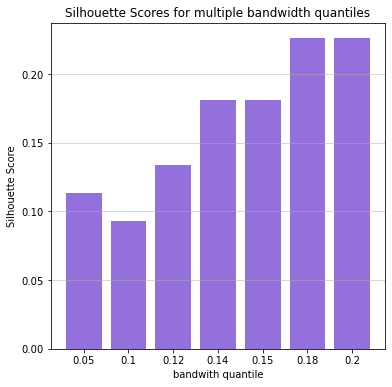

In [60]:
mean_shift_score(X_variance, [0.05, 0.1, 0.12, 0.14, 0.15, 0.18, 0.2])

Higher values would only yield one cluster, so even if their silhouette score is better, they are not interesting

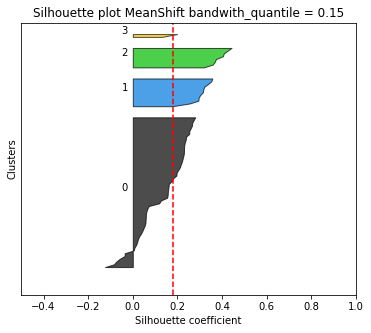

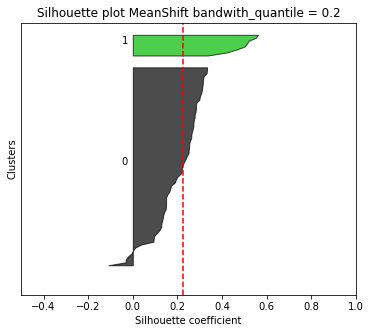

In [61]:
sil_mean_shift(X_variance, [0.15, 0.2])

These silhouettes are somewhat familiar. The algorithm can find two and four clusters.

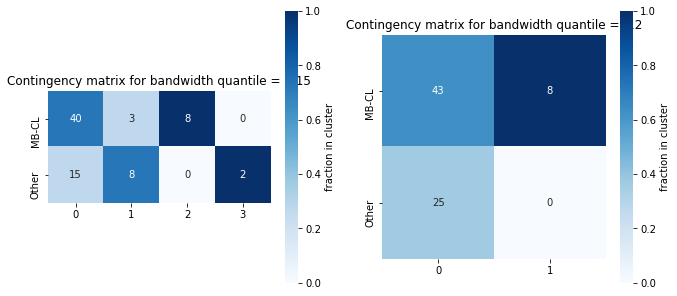

In [62]:
contingency_plot_ms(X_variance, [0.15, 0.2])

For the case with two clusters, the second cluster only has 8 points, so we consider that the results with four clusters are better, even though their silhouette score is worse.

### 7.2 Clustering with PCA

The scores:

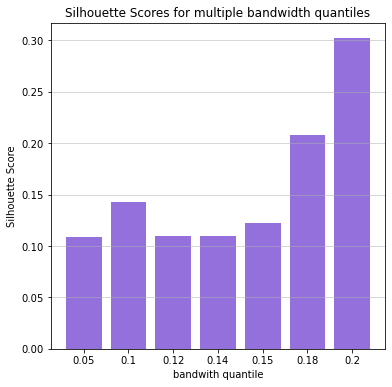

In [63]:
mean_shift_score(X_PCA, [0.05, 0.1, 0.12, 0.14, 0.15, 0.18, 0.2])

The silhouettes for the best scores:

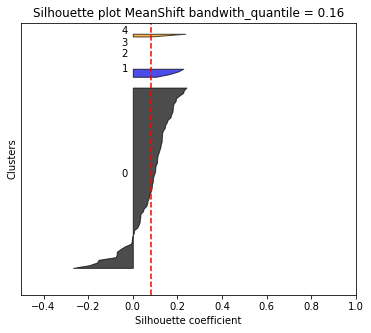

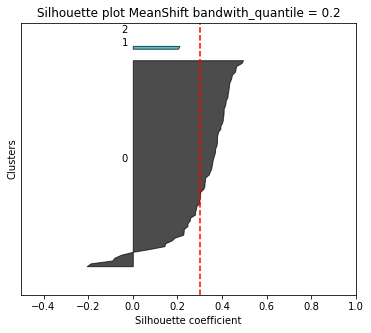

In [64]:
sil_mean_shift(X_PCA, [0.16,0.2])

The cluster with no silhouette drawn is actually the equivalent to one of the other clusters. This has to do with how mean shift is calculated, because "means" that converge to very similar places get named differently, but since they end up representing the same cluster, the algorithm puts them together.

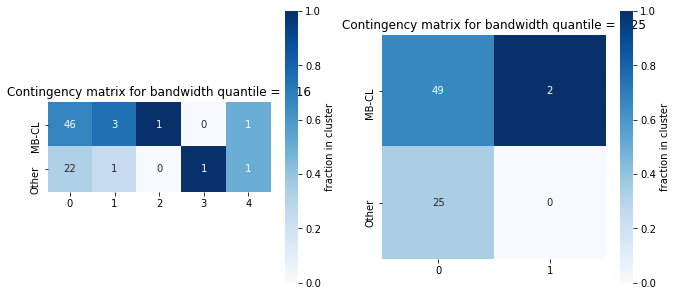

In [65]:
contingency_plot_ms(X_PCA, [0.16,0.25])

* Using PCA the algorithm has trouble finding good clusters. Probably the explained variance ratio that was selected before for PCA does not work for this algorithm and would need to be adapted.

* The best results were found for X_variance with bandwith quantile 0.15 and variance filtering.

* Although four clusters were found, this algorithm seems to tend to put the majority of the data in a single cluster.

* Even so, the contingency matrices have some resemblance with previous results, so probably some of the clusters found are equivalent to other algorithms.

### 7.3 Comparing results

In [66]:
model_dict= {"K-Means": KMeans(n_clusters=4, random_state=10).fit(X_variance),
             "HCA": AgglomerativeClustering(linkage="complete", n_clusters=3).fit(X_variance),
             "DBSCAN": DBSCAN(eps=3.8, min_samples=5).fit(X_variance),
             "Mean Shift": MeanShift(bandwidth=estimate_bandwidth(X_variance, 0.15, random_state=42)).fit(X_variance)}


dataset_dict= {"K-Means": X_variance,
             "HCA": X_variance,
             "DBSCAN": X_variance,
             "Mean Shift": X_variance}

scores_dict={}
for key, value in model_dict.items():
  cluster_labels = value.labels_
  c_score = round(metrics.fowlkes_mallows_score(labels['class'], cluster_labels),3)
  s_score = round(silhouette_score(dataset_dict[key], cluster_labels), 3)
  scores_list=[s_score, c_score]
  scores_dict[key] = scores_list

ch_scores = pd.DataFrame(scores_dict, index=['Silhouette','Fowlkes Mallows'])
ch_scores.transpose()

/home/advertio/anaconda3/envs/aulas/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass quantile=0.15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Silhouette,Fowlkes Mallows
K-Means,0.234,0.445
HCA,0.245,0.600
DBSCAN,0.179,0.600
Mean Shift,0.181,0.601


* Curiously HCA, DBSCAN and Mean Shift all achieve the same Fowlkes Mallows score. That might just be a big coincidence or it might indicate that the clusters they found are similar. The contingency matrices of these models are not so equal, so a possible explanation to what happened is the following:
    * there are points which the algorithms have no trouble clustering together
    * that clustering serves as a good basis to classify meduloblastoma types
    * there are other points that are harder to classify and get lumped with the good clusters
    * those points will polute the "good clusters" that were previously mentioned
    * in different algorithms those points polute different "good" clusters
    * this leads to different clusters and contingency matrices, but the number of bad points stay the same, leading to the same overall score

## 8. Conclusions

* First of all, there is a crucial point that should be made in this analysis. The variance filtering and PCA steps were optimized for Kmeans clustering, and those steps remained unchanged so as to not make the analysis too extensive and to provide a good comparison basis for the other models. Ideally, for each algorithm, we would fiddle with the parameters of the dimensionality reduction techniques to see what works best.

* Regarding the algorithms, the one that achieved best combination of Silhouette and Fowlkes Mallows score was HCA, so that is the winner. In fact HCA is widely used in genomic analysis applications so it is not surprising to see this.

Regarding the meduloblastoma types we'll do the an analysis using the HCA results with average linkage as an example since it yielded great results with the different cluster sizes:

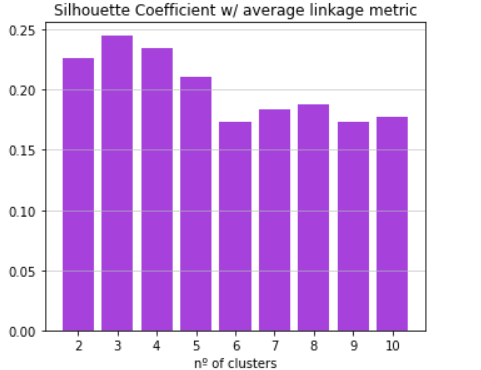

Note that these trends are also observed with other algorithms.

First, we note that there seems to be a cluster/group of MB-CL samples that most algorithms identify very clearly, most often having 8 samples of MB-CL and zero of Other. Notice the clustering with two clusters in the following image:

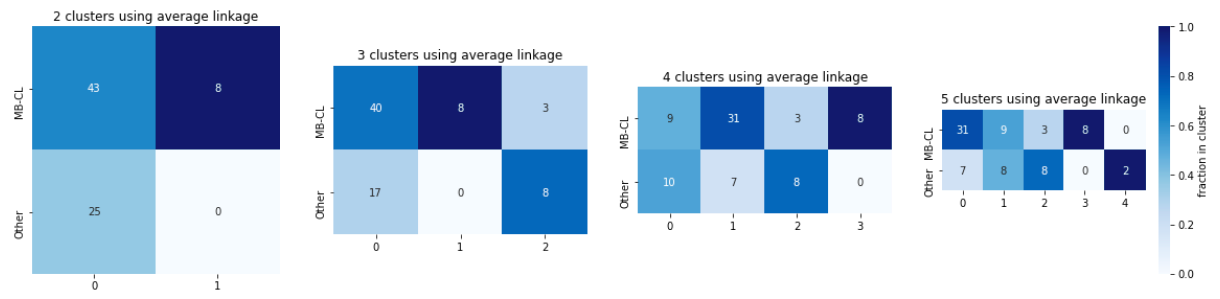

Then it's common to get another group that has a majority of samples of Other but has some samples of MB-CL. That can be seen when K=3.

When K=4, a large group is found containing a majority of samples from MB-CL and some samples of Other. The group that's left contains a mix of Other and MB-CL samples.

Finally, the last group is found containing just two samples of Other, possibly this group is composed of the two samples of medullomyoblastoma.

With this information, you could do severall things. For example if a person has a genomic profile that falls within the first cluster then it's very likely that she belongs to the MB-CL type.


A limitation of this work, was the small amount of samples, as it is hard to distinguish if a cluster is just small or an outlier. Furthermore it would be easier to understand the patterns in each cluster, as noise wouldn't have so much impact.